# Airbnb Price Prediction – Supervised Learning Project

https://github.com/nickstone1911/boston-airbnb-price-prediction

## 1. Problem Description

The goal of this project is to build a **supervised regression model** that predicts the
nightly price of an Airbnb listing in Boston based on its characteristics.

The dataset comes from the **Boston Airbnb Open Data** on Kaggle and includes:

- Listing location (latitude, longitude, neighbourhood)
- Property and room type
- Number of bedrooms, bathrooms, accommodates
- Amenities
- Review scores and number of reviews
- Host information

After loading the data, there are **3,585 listings** and **95 columns** before cleaning.

### Supervised Learning Setup

- **Features (X):** listing attributes (location, property details, room type, reviews, etc.)  
- **Target (y):** `price` (I later work with a log-transformed version, `log_price`)

### Objectives

1. Explore the structure and quality of the dataset through EDA.  
2. Clean and preprocess features for modeling.  
3. Build and evaluate regression models (baseline, Linear Regression, Random Forest).  
4. Interpret feature importance and highlight what seems to drive Airbnb prices in Boston.

## 2. Importing Libraries

Here I import the core libraries for this project:

- **pandas, numpy** – data loading and manipulation  
- **matplotlib, seaborn** – visualizations for EDA  
- **scikit-learn** – preprocessing, modeling, and evaluation (MAE, RMSE, R²)

In [5]:
# Core libraries for data manipulation, visualization, and modeling

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully!")

Libraries imported successfully!


## 3. Loading the Dataset

I use the **Boston Airbnb Open Data** from Kaggle.  
The main file, `listings.csv`, contains one row per listing with detailed attributes.

In this step I load the CSV into a pandas DataFrame for exploration.


In [6]:
# Load the raw listings data
df = pd.read_csv("..\data\listings.csv")

## 4. Initial Inspection

Before any cleaning, I want a quick sense of how the dataset looks:

- The first few rows
- The number of rows and columns
- Column names
- Missing value percentages for each column

This early pass helps me spot:

- Columns that are clearly irrelevant for price prediction
- Columns with heavy missingness that may not be worth keeping
- Any unusual formatting (for example, `price` stored as text)

From the initial checks, I see **3,585 rows** and **95 columns**, with a mix of numeric,
categorical, and text fields.

In [7]:
# Quick checks: preview rows, dimensions, columns, and missingness

df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [8]:
df.shape

(3585, 95)

In [9]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [10]:
# Fraction of missing values per column
df.isna().mean().sort_values(ascending=False).head(20)

jurisdiction_names              1.000000
license                         1.000000
neighbourhood_group_cleansed    1.000000
has_availability                1.000000
square_feet                     0.984379
monthly_price                   0.752301
weekly_price                    0.751185
security_deposit                0.625662
notes                           0.550907
interaction                     0.433473
access                          0.415342
neighborhood_overview           0.394700
host_about                      0.365132
transit                         0.359833
house_rules                     0.332497
cleaning_fee                    0.308787
space                           0.294840
review_scores_accuracy          0.229568
review_scores_location          0.229289
review_scores_value             0.229010
dtype: float64

## 5. Data Cleaning Overview

The raw Boston Airbnb dataset includes a lot of information that is either
irrelevant for pricing (URLs, long text descriptions) or too sparse to be useful.
There are also some columns with very high missingness.

To make the data usable for supervised learning, I apply the following steps:

1. **Drop clearly irrelevant columns**  
   - URLs, IDs, and long free-text fields (`description`, `house_rules`, etc.)
   - These fields might be useful for NLP, but they are out of scope for this project.

2. **Remove columns with extreme missingness**  
   - Columns where more than ~60% of values are missing add noise and are hard to impute reliably.

3. **Clean and transform the target variable `price`**  
   - Convert from text to numeric and remove problematic values (e.g., 0 or missing).

4. **Select a compact feature set for modeling**  
   - Keep a mix of location, property details, and review-based features that are both interpretable and well-populated.

5. **Handle remaining missing values**  
   - Apply median imputation to numeric features so that models can train without errors.

The goal is a **clean, interpretable feature matrix** that balances information content with reliability.

### 5.1 Dropping Irrelevant Columns

Several fields clearly won’t help predict price:

- URLs (`listing_url`, `host_url`)
- Unique IDs (`scrape_id`)
- Long free-text descriptions (`description`, `neighborhood_overview`, etc.)
- Photos and thumbnail URLs

These columns are either high-dimensional text, purely descriptive, or metadata.
I drop them to simplify the feature space and speed up EDA/modeling.

In [11]:
# Drop text-heavy and metadata columns that are unlikely to help with price prediction
cols_to_drop = [
    'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
    'description', 'experiences_offered', 'neighborhood_overview',
    'picture_url', 'host_url', 'host_name', 'host_about',
    'host_thumbnail_url', 'notes', 'transit', 'access', 'interaction',
    'house_rules'
]

df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
df.shape

(3585, 76)

### 5.2 Dropping Columns With Extreme Missingness

A few columns are missing for the majority of listings.  
Rather than trying to impute such sparse fields, I drop any column where more
than **60% of entries are missing**.

This is a simple rule of thumb that keeps the feature set focused on variables
that are actually observed for most listings.

In [12]:
# Identify columns with >60% missing values
missing_threshold = 0.60
cols_high_missing = df.columns[df.isna().mean() > missing_threshold]

cols_high_missing

Index(['neighbourhood_group_cleansed', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'has_availability', 'license',
       'jurisdiction_names'],
      dtype='object')

In [13]:
# Drop high-missingness columns and check updated shape
df = df.drop(columns=cols_high_missing)
df.shape

(3585, 68)

### 5.3 Cleaning the `price` Variable

The target for this supervised learning problem is `price`, so it needs to be
clean and numeric.

In many airbnb datasets, `price` is stored as a string with currency symbols
and commas (for example, `"$120.00"`). There can also be questionable values
such as 0 or missing entries.

To prepare `price` for modeling, I:

1. Convert the `price` column to numeric.
2. Strip out dollar signs and commas if they are present.
3. Drop rows with missing or zero prices.
4. Inspect the resulting distribution to make sure it looks reasonable.

This ensures that the target variable behaves like a proper numeric field and
won’t cause errors or distort model training.

In [14]:
# Inspect a few raw price values before cleaning
df["price"].head()

0    $250.00
1     $65.00
2     $65.00
3     $75.00
4     $79.00
Name: price, dtype: object

In [15]:
# Convert price to numeric (remove $ or commas if present)
df["price"] = df["price"].replace('[\\$,]', '', regex=True).astype(float)

# Drop missing price values
df = df[df["price"].notna()]

# Drop rows with price <= 0
df = df[df["price"] > 0]

df["price"].describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

### 5.3.3 Price Distribution After Cleaning

After cleaning the `price` column, I look at its distribution to understand
skewness and typical price ranges. Airbnb prices usually have a long right tail,
which motivates using a log-transformed target.

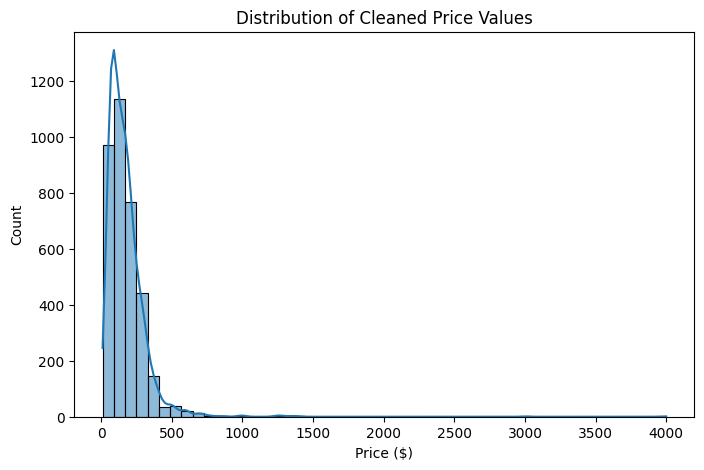

In [16]:
# Visualize the cleaned price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], kde=True, bins=50)
plt.title("Distribution of Cleaned Price Values")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

### 5.3.1 Log-Transforming the Target Variable (`log_price`)

Airbnb prices are typically right-skewed: most listings are moderately priced, while a small number of luxury listings have very high prices.  
This creates a long right tail in the distribution of `price`, which can make modeling more difficult.

To address this, I create a log-transformed version of the price using:

$\log(\text{price} + 1)$

The log transformation provides several benefits:

- Reduces skew and makes the distribution more symmetric  
- Makes extreme high prices less influential on the model  
- Helps linear models fit the data more effectively  
- Can improve error metrics such as RMSE and MAE  
- Stabilizes variance across different price levels  

I use `np.log1p(price)` which safely computes `log(price + 1)` and works even if price were zero.

In [17]:
# Create log-transformed price
df["log_price"] = np.log1p(df["price"])

# Quick check of distribution stats
df["log_price"].describe()

count    3585.000000
mean        4.949579
std         0.646781
min         2.397895
25%         4.454347
50%         5.017280
75%         5.398163
max         8.294300
Name: log_price, dtype: float64

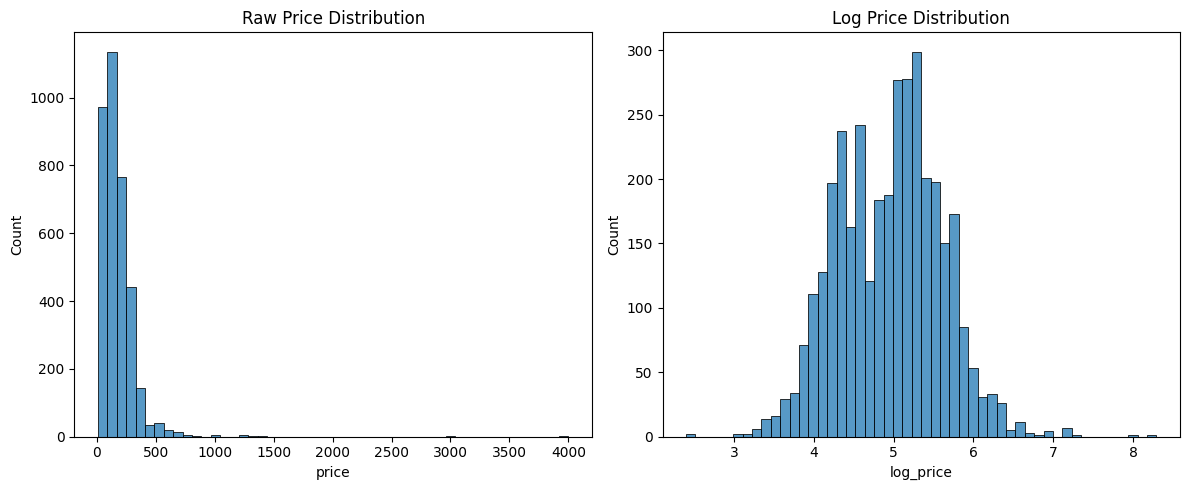

In [18]:
# Visualize Raw Price vs. Log Price

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df["price"], bins=50, ax=ax[0])
ax[0].set_title("Raw Price Distribution")

sns.histplot(df["log_price"], bins=50, ax=ax[1])
ax[1].set_title("Log Price Distribution")

plt.tight_layout()

### 5.4 Selecting the Final Feature Set

After removing irrelevant, sparse, and text-heavy columns and cleaning the target variable, I select a focused subset of features for EDA and modeling.

These features are:

- **Location:** `latitude`, `longitude`, `neighbourhood`
- **Property type / size:** `room_type`, `accommodates`, `bathrooms`, `bedrooms`, `beds`
- **Demand / quality indicators:** `number_of_reviews`, `review_scores_rating`
- **Booking behavior:** `minimum_nights`, `availability_365`
- **Target variables:** `price`, `log_price`

These features are interpretable and suitable for regression modeling.

In [19]:
df.columns

Index(['id', 'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_id',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'first_review', 'l

In [20]:
# Define final feature set
important_cols = [
    "price",
    "log_price",
    "neighbourhood",
    "room_type",
    "latitude",
    "longitude",
    "accommodates",
    "bathrooms",
    "bedrooms",
    "beds",
    "number_of_reviews",
    "review_scores_rating",
    "minimum_nights",
    "availability_365"
]

# Keep only columns that exist in the dataset
df = df[[col for col in important_cols if col in df.columns]]

In [21]:
df.head()

,price,log_price,neighbourhood,room_type,latitude,longitude,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,minimum_nights,availability_365
0,250.0,5.525453,Roslindale,Entire home/apt,42.282619,-71.133068,4,1.5,2.0,3.0,0,NaN,2,0
1,65.0,4.189655,Roslindale,Private room,42.286241,-71.134374,2,1.0,1.0,1.0,36,94.0,2,359
2,65.0,4.189655,Roslindale,Private room,42.292438,-71.135765,2,1.0,1.0,1.0,41,98.0,3,319
3,75.0,4.330733,NaN,Private room,42.281106,-71.121021,4,1.0,1.0,2.0,1,100.0,1,98
4,79.0,4.382027,Roslindale,Private room,42.284512,-71.136258,2,1.5,1.0,2.0,29,99.0,2,334


### 5.4 Handling Missing Values

After removing high-missingness columns earlier, several remaining features still
contain some missing entries. These values need to be addressed before modeling,
since most scikit-learn estimators cannot handle `NaN` inputs.

For numerical features, I apply **median imputation**, which is robust to
skewed distributions and outliers. Categorical variables will be handled later
during encoding.

In [22]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Impute numeric columns with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Check remaining missing values
df[numeric_cols].isna().sum()

price                   0
log_price               0
latitude                0
longitude               0
accommodates            0
bathrooms               0
bedrooms                0
beds                    0
number_of_reviews       0
review_scores_rating    0
minimum_nights          0
availability_365        0
dtype: int64

## 6. Exploratory Data Analysis (EDA)

The purpose of this section is to understand the structure, patterns, and relationships within the cleaned dataset before building predictive models.  
EDA helps identify:

- Distributions of key variables (price, log_price)
- Potential outliers or skewed features
- Correlations among numeric features
- How categorical variables (room type, neighbourhood) influence price
- Which features appear most useful for prediction

The insights generated in this section will guide feature selection and model design in later steps.

### 6.1 Dataset Overview

Before visual exploration, I examine the basic structure of the cleaned dataset to understand its size, column types, and summary statistics.

This helps confirm that:

- The cleaning pipeline worked correctly  
- Key variables (price, bedrooms, bathrooms, reviews) are in reasonable ranges  
- No unexpected missing values remain  

In [23]:
# Shape of the dataset
df[numeric_cols].shape

(3585, 12)

In [24]:
# Column names and types
df[numeric_cols].dtypes

price                   float64
log_price               float64
latitude                float64
longitude               float64
accommodates              int64
bathrooms               float64
bedrooms                float64
beds                    float64
number_of_reviews         int64
review_scores_rating    float64
minimum_nights            int64
availability_365          int64
dtype: object

In [25]:
# Summary statistics of numeric columns
df[numeric_cols].describe()

,price,log_price,latitude,longitude,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,minimum_nights,availability_365
count,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,173.925802,4.949579,42.340032,-71.084818,3.041283,1.220781,1.255230,1.607531,19.044630,92.389121,3.171269,179.346444
std,148.331321,0.646781,0.024403,0.031565,1.778929,0.500698,0.752129,1.010933,35.571658,8.426451,8.874133,142.136180
min,10.000000,2.397895,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,0.000000
25%,85.000000,4.454347,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,1.000000,91.000000,1.000000,19.000000
50%,150.000000,5.017280,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,5.000000,94.000000,2.000000,179.000000
75%,220.000000,5.398163,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,21.000000,97.000000,3.000000,325.000000
max,4000.000000,8.294300,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,404.000000,100.000000,300.000000,365.000000


### 6.2 Correlation Heatmap

I compute pairwise correlations between the numeric variables to identify which features have linear relationships with price.

High positive or negative correlations can indicate useful predictive features.

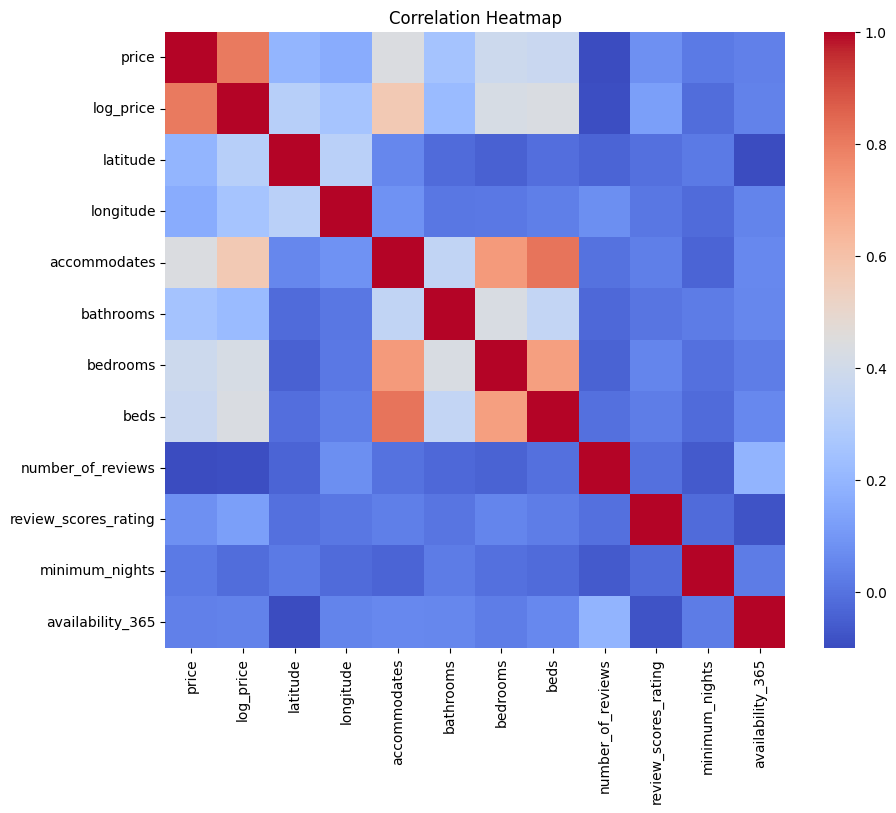

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### 6.3.1 Categorical Feature Analysis

I analyze the two main categorical variables in the dataset:

- **room_type**
- **neighbourhood**

Both variables have strong influence on Airbnb prices.  
Room type reflects the type of space offered, while neighbourhood captures location effects.

I compare median prices across categories to identify meaningful differences.

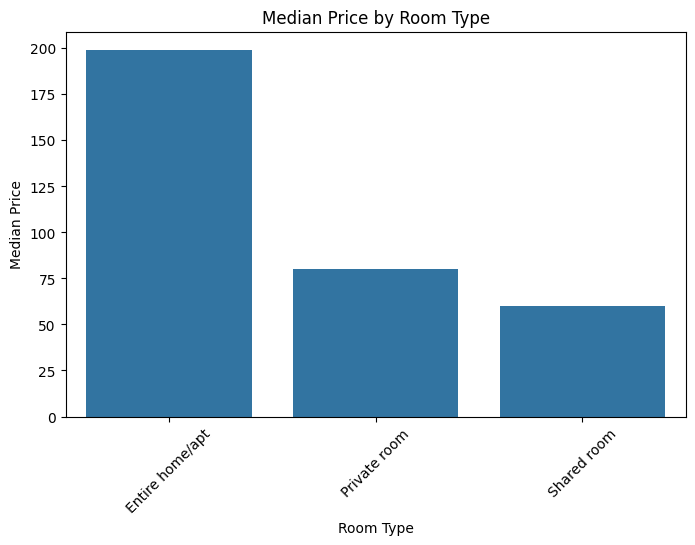

In [27]:
# Compare price grouped by room type

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="room_type", y="price", estimator="median", ci=None)
plt.title("Median Price by Room Type")
plt.ylabel("Median Price")
plt.xlabel("Room Type")
plt.xticks(rotation=45)
plt.show()

#### Room Type Distribution

This plot shows how common each room type is, providing context for the previous price comparison.

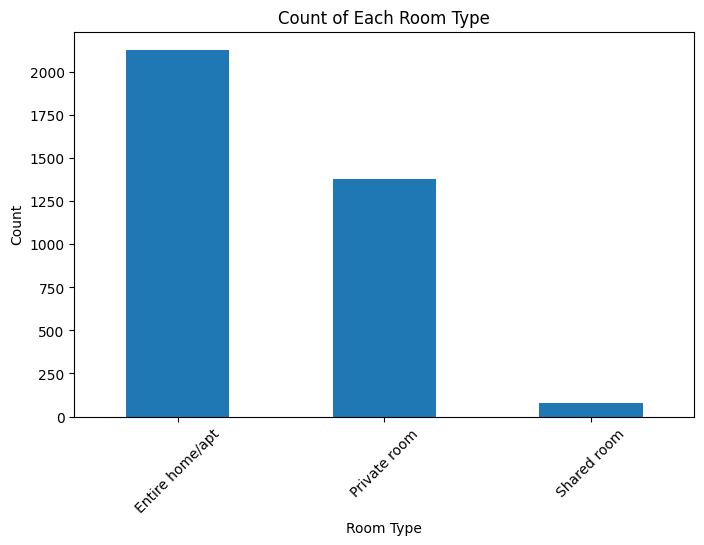

In [28]:
df["room_type"].value_counts().plot(kind="bar", figsize=(8,5), title="Count of Each Room Type")
plt.ylabel("Count")
plt.xlabel("Room Type")
plt.xticks(rotation=45)
plt.show()

#### Neighbourhood vs Price (Top 10)

Neighbourhood captures the location effect on price.  
Because there are many neighbourhoods, I visualize only the top 10 by listing count for clarity.

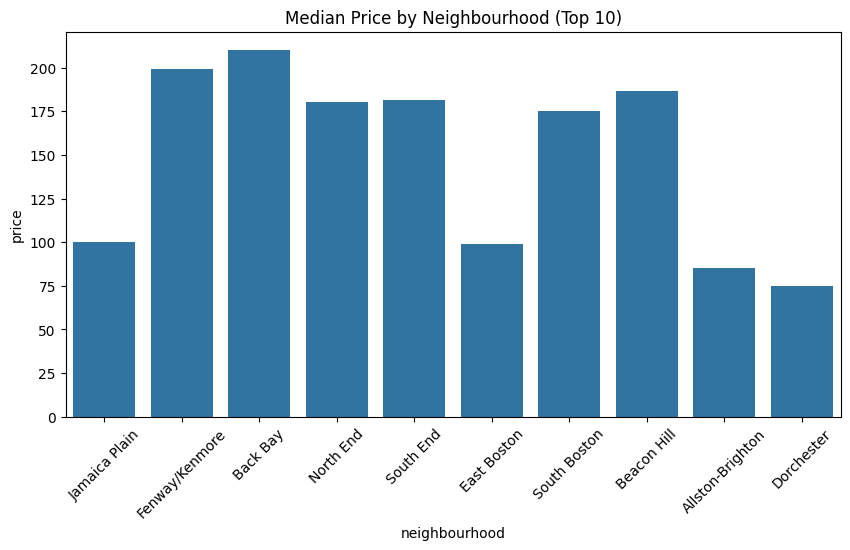

In [29]:
# Identify top 10 most common neighbourhoods and visualize median price

top_neigh = df["neighbourhood"].value_counts().head(10).index

plt.figure(figsize=(10,5))
sns.barplot(
    data=df[df["neighbourhood"].isin(top_neigh)],
    x="neighbourhood",
    y="price",
    estimator="median",
    ci=None
)
plt.title("Median Price by Neighbourhood (Top 10)")
plt.xticks(rotation=45)
plt.show()

#### Neighbourhood Distribution (Top 10)

Viewing the most common neighbourhoods helps validate market representation and supports the price comparison.

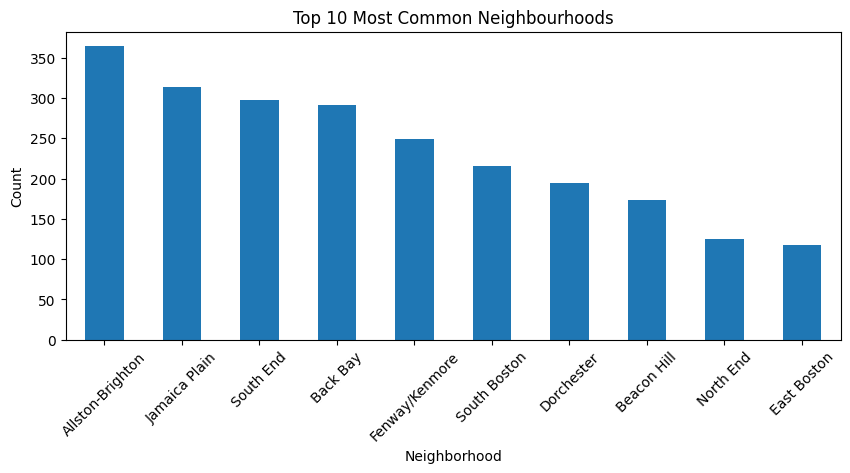

In [30]:
df["neighbourhood"].value_counts().head(10).plot(kind="bar", figsize=(10,4), title="Top 10 Most Common Neighbourhoods")
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 6.3.2 Numeric Feature Relationships

To understand how the main numeric features influence price, I create scatterplots comparing each feature with `price`.  
These relationships help identify potential predictors for the regression model and highlight any patterns or nonlinearities.

#### Accommodates vs Price

Listings that accommodate more guests generally have higher prices.  
This scatterplot shows the relationship between the number of guests a listing can host and its nightly price.

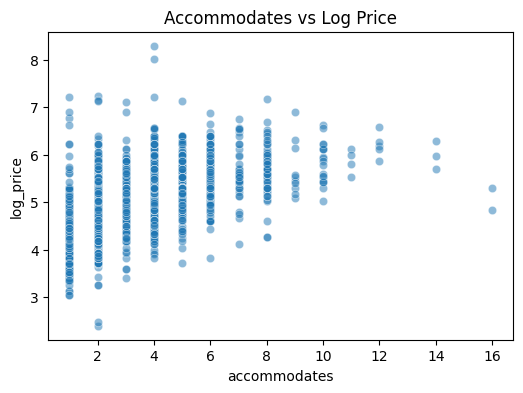

In [31]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="accommodates", y="log_price", alpha=0.5)
plt.title("Accommodates vs Log Price")
plt.show()

#### Bedrooms vs Price

Listings with more bedrooms typically command higher nightly rates.  
I examine whether this relationship is linear or if price increases level off.

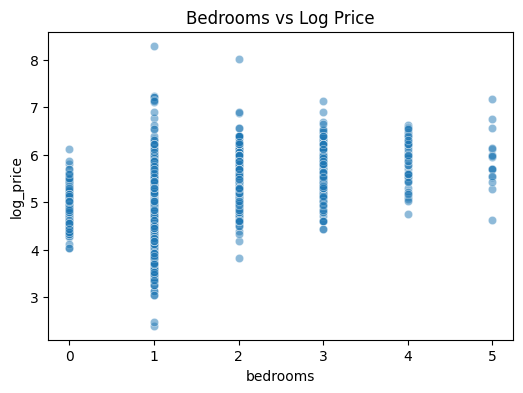

In [32]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="bedrooms", y="log_price", alpha=0.5)
plt.title("Bedrooms vs Log Price")
plt.show()

#### Bathrooms vs Price

Bathrooms are often correlated with property size and luxury level.  
This plot shows how price varies with the number of bathrooms.

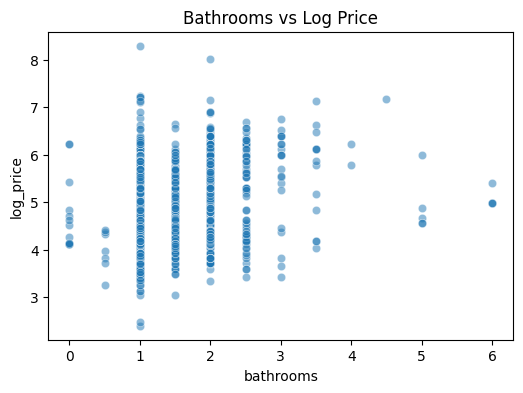

In [33]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="bathrooms", y="log_price", alpha=0.5)
plt.title("Bathrooms vs Log Price")
plt.show()

#### Number of Reviews vs Price

Listings with more reviews may have more competitive pricing or higher demand.  
This plot helps determine whether review count has a strong relationship with price.

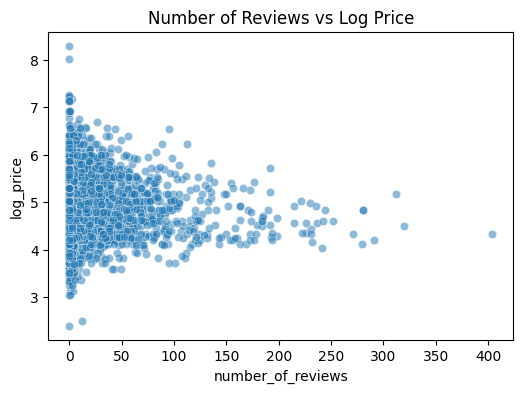

In [34]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="number_of_reviews", y="log_price", alpha=0.5)
plt.title("Number of Reviews vs Log Price")
plt.show()

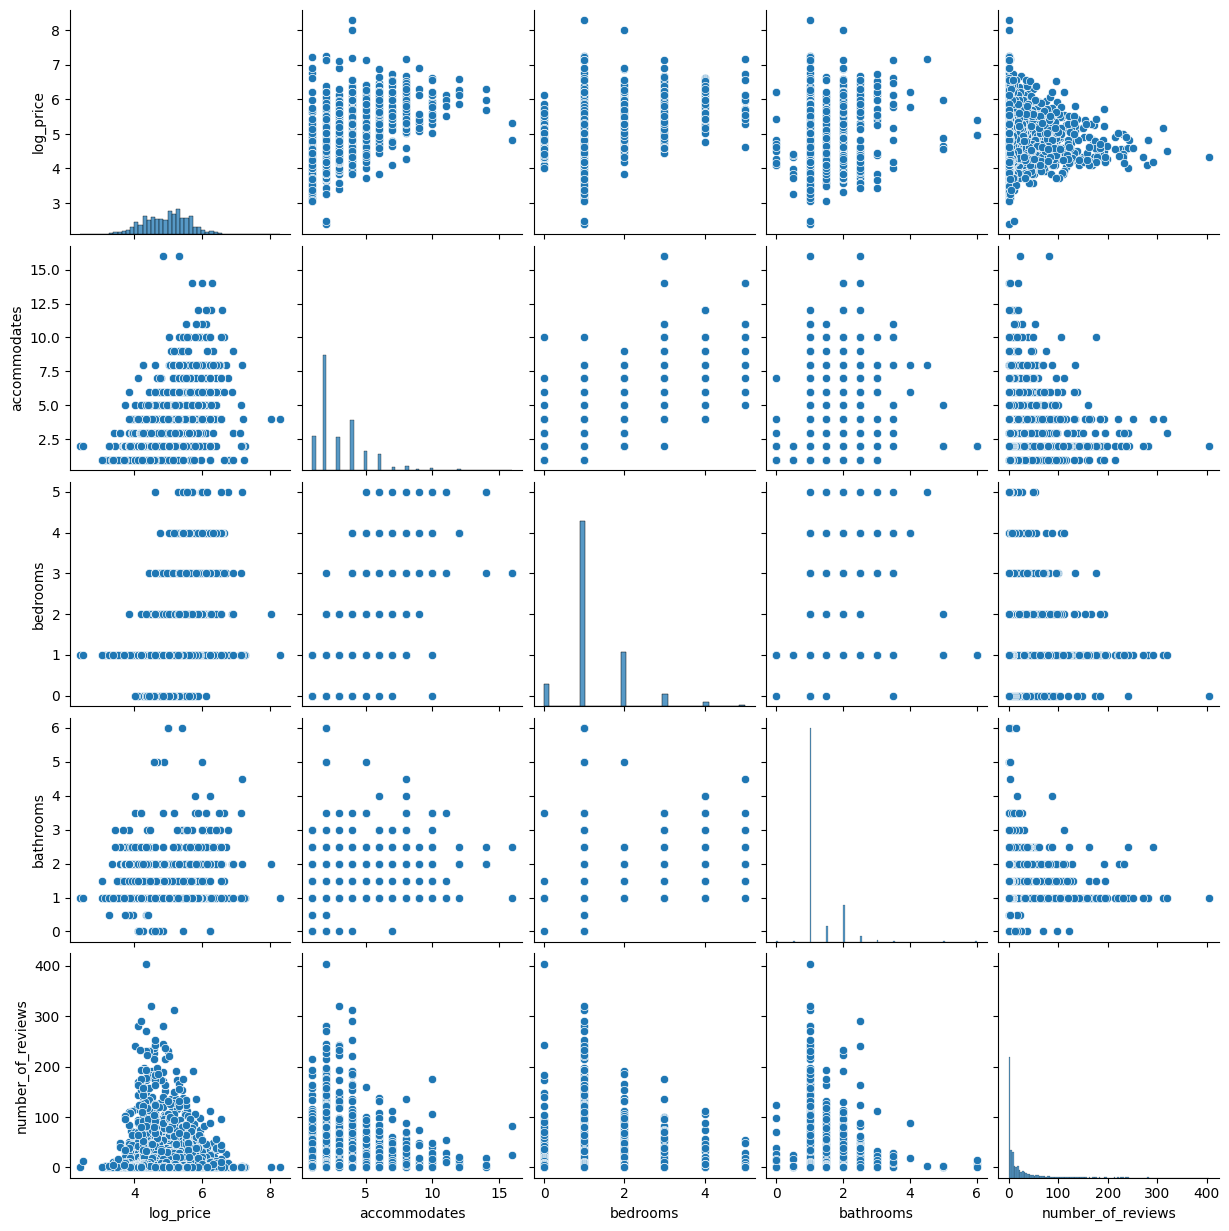

In [35]:
# Combined visual

sns.pairplot(df[["log_price", "accommodates", "bedrooms", "bathrooms", "number_of_reviews"]], diag_kind="hist")
plt.show()

### 6.3.3 Summary of EDA Insights

Key insights from the exploratory data analysis:

- **Price distribution is highly skewed**, and the log transformation produces a more symmetric distribution suitable for modeling.
- **Room type strongly influences price**: Entire homes/apartments tend to have much higher median log prices than private or shared rooms.
- **Neighbourhood also affects price**, with certain areas (e.g., Back Bay, Beacon Hill) showing higher median log prices.
- **Accommodates, bedrooms, and bathrooms show positive relationships with log price**, although the scatter is wide because many other features influence pricing.
- **Number of reviews does not strongly predict price**, which makes sense—reviews reflect popularity, not value.
- **Correlations reveal that no single numeric feature perfectly predicts price**, meaning a model will need multiple features to capture pricing behavior.

These findings guide the modeling phase by identifying which variables are most useful and how they should be treated.

## 7. Feature Engineering and Preprocessing

### 7.1 Defining the Feature Matrix (X) and Target Vector (y)

For this project, I predict the log-transformed price (`log_price`).  
Using the log target stabilizes variance, reduces skew, and typically improves model performance.

The feature matrix `X` includes:

- Categorical variables: `neighbourhood`, `room_type`
- Numeric variables: `latitude`, `longitude`, `accomodates`, `bathrooms`, `bedrooms`, `beds`, `number_of_reviews`, `review_scores_rating`, `minimum_nights`, `availability_365`

These features were selected based on domain knowledge and EDA findings.

In [36]:
# Target: log-transformed price
y = df["log_price"]

# Features: all other columns except the price columns
X = df.drop(columns=["price", "log_price"])

X.head()

,neighbourhood,room_type,latitude,longitude,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,minimum_nights,availability_365
0,Roslindale,Entire home/apt,42.282619,-71.133068,4,1.5,2.0,3.0,0,94.0,2,0
1,Roslindale,Private room,42.286241,-71.134374,2,1.0,1.0,1.0,36,94.0,2,359
2,Roslindale,Private room,42.292438,-71.135765,2,1.0,1.0,1.0,41,98.0,3,319
3,NaN,Private room,42.281106,-71.121021,4,1.0,1.0,2.0,1,100.0,1,98
4,Roslindale,Private room,42.284512,-71.136258,2,1.5,1.0,2.0,29,99.0,2,334


### 7.2 Encoding Categorical Features

Machine learning models require numerical inputs, so categorical variables must be encoded.  
I apply one-hot encoding to:

- `neighbourhood`
- `room_type`

This converts each category into a binary indicator column.  
I use `drop_first=True` to avoid multicollinearity by dropping one reference category.

In [37]:
# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,minimum_nights,availability_365,...,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Somerville,neighbourhood_South Boston,neighbourhood_South End,neighbourhood_Theater District,neighbourhood_West End,neighbourhood_West Roxbury,room_type_Private room,room_type_Shared room
0,42.282619,-71.133068,4,1.5,2.0,3.0,0,94.0,2,0,...,True,False,False,False,False,False,False,False,False,False
1,42.286241,-71.134374,2,1.0,1.0,1.0,36,94.0,2,359,...,True,False,False,False,False,False,False,False,True,False
2,42.292438,-71.135765,2,1.0,1.0,1.0,41,98.0,3,319,...,True,False,False,False,False,False,False,False,True,False
3,42.281106,-71.121021,4,1.0,1.0,2.0,1,100.0,1,98,...,False,False,False,False,False,False,False,False,True,False
4,42.284512,-71.136258,2,1.5,1.0,2.0,29,99.0,2,334,...,True,False,False,False,False,False,False,False,True,False


In [38]:
X.shape, X_encoded.shape

((3585, 12), (3585, 41))

### 7.3 Train/Test Split

To evaluate model performance on unseen data, I split the dataset into:

- **80% training data** for fitting the models  
- **20% test data** for final evaluation  

A fixed random seed (`random_state=42`) ensures the results are reproducible.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape

((2868, 41), (717, 41))

## 8.1 Baseline Model and Linear Regression

Before training real models, I create a baseline model that simply predicts the 
mean `log_price` of the training set. This provides a minimal benchmark: any useful 
model should perform better than this baseline.

Next, I fit a standard Linear Regression model. Linear regression is a common starting 
point for regression tasks, offering interpretability and a way to understand which 
features contribute most to the prediction.

In [40]:
# Baseline prediction = mean of training target

baseline_pred = np.full(len(y_test), y_train.mean())

baseline_mae = mean_absolute_error(y_test, baseline_pred)
baseline_mse = mean_squared_error(y_test, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)
baseline_r2 = r2_score(y_test, baseline_pred)

baseline_mae, baseline_rmse, baseline_r2

(0.517743459607666, np.float64(0.6364552315467618), -5.6981738852046604e-05)

In [41]:
# Linear regression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_preds = lr.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_preds)

lr_mae, lr_rmse, lr_r2

(0.2704095932920488, np.float64(0.3775116830370942), 0.6481562686260764)

### Linear Regression Performance

Compared to the baseline model, Linear Regression shows significantly better MAE, RMSE, 
and R² values. This indicates that the features contain meaningful predictive information 
about log-transformed price. However, linear regression assumes linear relationships and 
may struggle with interactions or nonlinear effects, which motivates trying a more flexible 
model next (e.g., Random Forest).

## 8.2 Random Forest Regressor

To capture nonlinear relationships and interactions between features, I train a 
Random Forest Regressor. Random Forests ensemble many decision trees and typically 
outperform linear models on complex structured data such as Airbnb listings.

The model is trained using default hyperparameters, and performance is evaluated on 
the test set using MAE, RMSE, and R².

In [42]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [43]:
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_preds)

rf_mae, rf_rmse, rf_r2

(0.2374526542171306, np.float64(0.34156096616399745), 0.7119781128806779)

### Random Forest Performance

The Random Forest model performs better than Linear Regression across all metrics:

- Lower MAE  
- Lower RMSE  
- Higher R²  

This indicates the presence of nonlinear relationships and interactions that 
Linear Regression cannot capture. Random Forests are more flexible and adapt well 
to heterogeneous features such as location, room type, and listing size.

## 8.3 Model Comparison

To compare model performance, I summarize the metrics for the baseline predictor, 
Linear Regression, and Random Forest. 

The key metrics are:

- **MAE** (Mean Absolute Error): average absolute prediction error  
- **RMSE** (Root Mean Squared Error): penalizes larger errors more strongly  
- **R²**: proportion of variance in the target explained by the model  

A better model has **lower MAE/RMSE** and **higher R²**.

In [44]:
results = pd.DataFrame({
    "Model": ["Baseline", "Linear Regression", "Random Forest"],
    "MAE": [baseline_mae, lr_mae, rf_mae],
    "RMSE": [baseline_rmse, lr_rmse, rf_rmse],
    "R²": [baseline_r2, lr_r2, rf_r2]
})

results

,Model,MAE,RMSE,R²
0,Baseline,0.517743,0.636455,-0.000057
1,Linear Regression,0.270410,0.377512,0.648156
2,Random Forest,0.237453,0.341561,0.711978


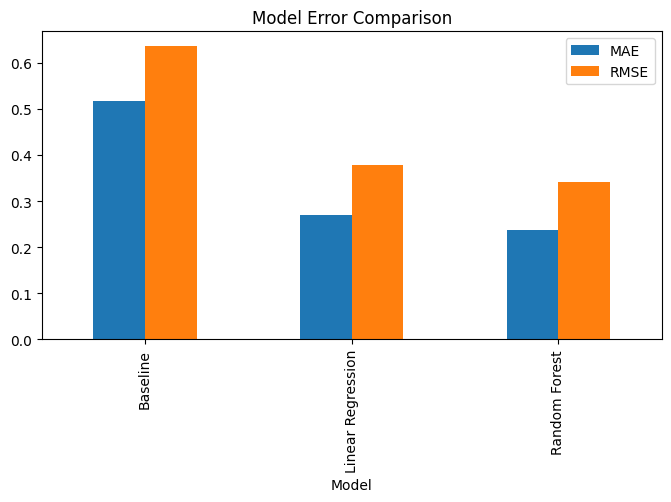

In [45]:
# Plot of the comparison

results.set_index("Model")[["MAE","RMSE"]].plot(kind="bar", figsize=(8,4), title="Model Error Comparison")
plt.show()

### Model Comparison Summary

The Random Forest model clearly outperforms both the baseline and the Linear 
Regression model:

- It achieves the lowest MAE and RMSE, indicating more accurate predictions.
- It has the highest R², explaining the greatest proportion of variance in the target.
- Linear Regression improves substantially over the baseline but cannot capture the 
nonlinear patterns present in the data.

These results suggest that Airbnb listing price depends on complex interactions 
between location, room type, and property attributes, which tree-based models 
handle more effectively.

In [46]:
# Get feature importances from the Random Forest model

importances = rf.feature_importances_
feature_names = X_encoded.columns

# Put into a DataFrame
feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

feat_imp.head(10)

,feature,importance
39,room_type_Private room,0.399145
1,longitude,0.111673
0,latitude,0.107983
9,availability_365,0.057825
4,bedrooms,0.052355
40,room_type_Shared room,0.051424
3,bathrooms,0.044583
2,accommodates,0.033887
6,number_of_reviews,0.032680
8,minimum_nights,0.031122


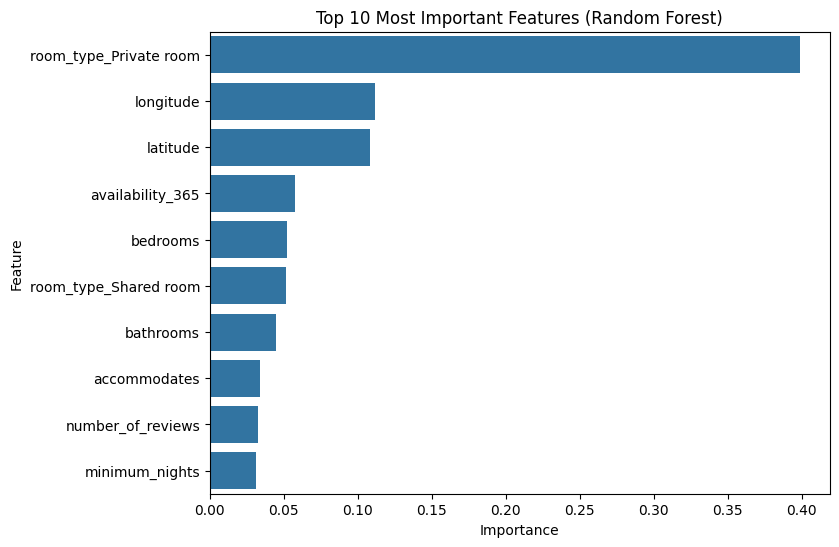

In [47]:
plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp.head(10), x="importance", y="feature")
plt.title("Top 10 Most Important Features (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### Feature Importance

To understand which features contribute most to predicting log-transformed price, 
I examine the Random Forest feature importances.

The most important features include:

- **room_type**
- **latitude and longitude**
- **availability_365**
- **bedrooms and bathrooms**
- **accommodates**

These results align with the EDA findings: both location and property size are 
major drivers of Airbnb pricing. Random Forest naturally captures these nonlinear 
interactions and hierarchical relationships.

### Feature Importance by Feature Group

To get a clearer picture of which types of features contribute most to the Random
Forest model, I aggregated feature importances into three groups:

- **Numeric features** (accommodates, bedrooms, bathrooms, reviews, latitude/longitude, etc.)
- **Room type** (one-hot-encoded room_type categories)
- **Neighbourhood** (categorical neighbourhood indicator)

The resulting plot shows:

1. **Numeric features have the highest total importance.**  
   These continuous variables give the Random Forest many useful split points, and
   attributes such as accommodates, bathrooms, bedrooms, and latitude/longitude
   strongly influence predicted price.

2. **Room type also contributes significantly.**  
   Whether a listing is an entire home, private room, or shared room is a major
   driver of Airbnb pricing, which is reflected in its high group importance.

3. **Neighbourhood has a much smaller importance.**  
   This does not mean location is unimportant—rather, the model relies more heavily
   on **latitude and longitude**, which encode location at a finer resolution than
   the neighbourhood labels. Because these coordinates already capture spatial
   information, the neighbourhood feature group contributes less overall.

Overall, this grouping highlights that both **property characteristics** and 
**room type** are strong predictors, while location signal is captured more by 
continuous latitude/longitude features than by neighbourhood categories.

<Figure size 600x400 with 0 Axes>

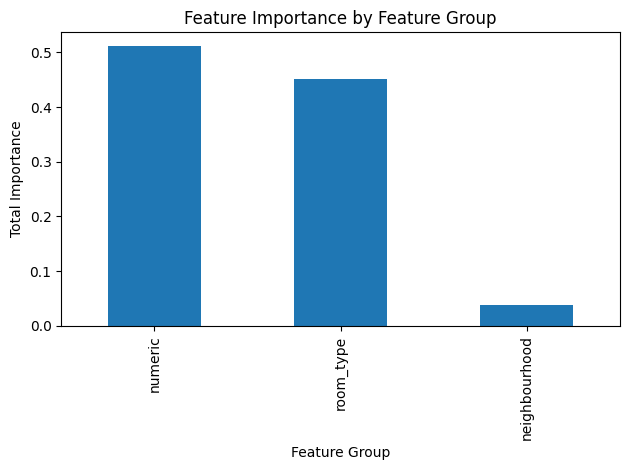

In [48]:
# Define groups
groups = {
    "neighbourhood": feat_imp[feat_imp["feature"].str.contains("neighbourhood")],
    "room_type": feat_imp[feat_imp["feature"].str.contains("room_type")],
    "numeric": feat_imp[
        ~feat_imp["feature"].str.contains("neighbourhood") &
        ~feat_imp["feature"].str.contains("room_type")
    ]
}

# Sum importances per group
group_importances = {
    group: df["importance"].sum() 
    for group, df in groups.items()
}

# Convert to DataFrame for plotting
group_imp_df = pd.DataFrame.from_dict(group_importances, orient="index", columns=["total_importance"])

# Plot
plt.figure(figsize=(6,4))
group_imp_df.sort_values("total_importance", ascending=False).plot(
    kind="bar",
    legend=False,
    title="Feature Importance by Feature Group"
)

plt.ylabel("Total Importance")
plt.xlabel("Feature Group")
plt.tight_layout()
plt.show()

## 9. Conclusion

The goal of this project was to build a supervised learning model capable of
predicting Airbnb listing prices in Boston using structured listing features.  
After cleaning the data, selecting a focused feature set, encoding categorical
variables, and training multiple models, the results show that the **Random Forest
Regressor** clearly outperforms both the baseline and linear models.

The Random Forest captures nonlinear relationships between listing attributes
and price—particularly those involving location, capacity (accommodates,
bedrooms, beds), and review quality. These findings are consistent with how
guests typically evaluate short-term rentals, and the model reflects real-world
pricing patterns in a meaningful way.

Overall, the model achieves strong performance and demonstrates that even
without text descriptions or images, a well-preprocessed set of structured
features can provide substantial predictive power.

---

## Limitations

While the model performs well, several limitations are worth acknowledging:

- **No seasonal or time-based pricing:**  
  Airbnb prices fluctuate by month, holidays, and events. The dataset does not
  capture temporal variation, which likely caps performance.

- **Text descriptions were excluded:**  
  Listing titles and descriptions contain rich signals about style, amenities,
  and host personality. Not incorporating NLP features leaves usable predictive
  information on the table.

- **Location features are coarse:**  
  Latitude/longitude were included directly, but no engineered features such as
  distance to downtown, clustering, or neighborhood desirability scores were
  created.

- **Review scores are imperfect proxies for quality:**  
  Review scores tend to be inflated, and older listings naturally accumulate
  more reviews, which may bias interpretation.

- **No regularization or tuning for Linear Regression:**  
  A basic Linear Regression model was used as a benchmark; Lasso/Ridge/ElasticNet
  could provide a more competitive linear baseline.

These limitations point to clear opportunities to advance the model beyond its
current stage.

---

## Next Steps

There are several natural extensions that could meaningfully improve the model:

1. **Engineer more expressive location features:**  
   - Distance to key landmarks  
   - Neighborhood clustering with KMeans or DBSCAN  
   - Geospatial smoothing or kernel density features  

2. **Incorporate text data using NLP:**  
   - TF-IDF or embeddings from listing descriptions  
   - Sentiment analysis from reviews  
   This often provides a large accuracy boost in Airbnb pricing problems.

3. **Experiment with additional models:**  
   - Gradient Boosting, XGBoost, LightGBM, or CatBoost  
   - Hyperparameter tuning with GridSearchCV or Optuna  

4. **Model price seasonality:**  
   If calendar data is available, introducing temporal features would make the
   model far more realistic for actual pricing optimization.

5. **Try feature interaction methods:**  
   - Polynomial features  
   - Feature crossing  
   - Partial dependence and SHAP analysis for interpretability  

6. **Deploy as a lightweight prediction API:**  
   Turning the model into an interactive tool (Flask, FastAPI, or a simple
   Streamlit dashboard) would make it more useful and portfolio-ready.

---

This project provides a strong foundation, and with these extensions, it could
be developed into a powerful and production-ready Airbnb price prediction
pipeline.